### Importación de datos



In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# Objetivos: ¿Que tienda debe vender para invertir en un nuevo negocio?
# ¿Que tienda tiene más ventas?
# Facturación total de cada tienda
# ¿Que tienda tiene más productos vendidos? # ¿Que tienda tiene menos productos vendidos?
# promedio de calificacion de los clientes
# producto mas y menos vendido
# costo promedio del envio

#1. Análisis de facturación



la tienda con más ventas es: Bogotá


<Axes: xlabel='Lugar de Compra'>

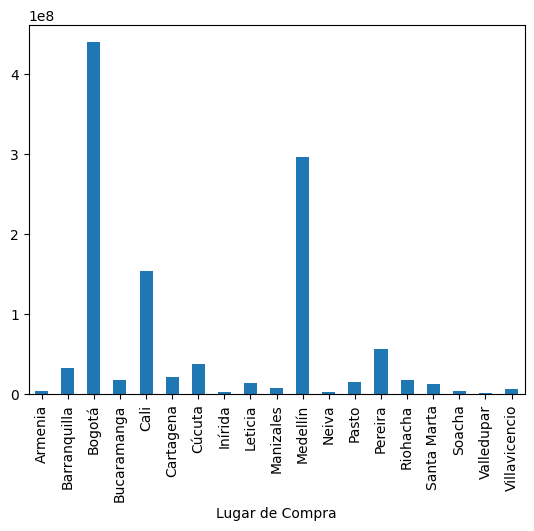

In [30]:
# ¿Que tienda tiene más ventas?
import matplotlib.pyplot as plt
ventas_tienda = tienda.groupby("Lugar de Compra")["Precio"].sum()
tienda_masVentas = ventas_tienda.idxmax()
print(f"la tienda con más ventas es: {tienda_masVentas}")
ventas_tienda.plot(kind="bar")

In [48]:
# Facturación total de cada tienda
facturacion_tienda = tienda.groupby("Lugar de Compra")["Precio"].sum()
print(f"la facturación total de cada tienda es: \n{facturacion_tienda}")

la facturación total de cada tienda es: 
Lugar de Compra
Armenia            4615700.0
Barranquilla      32907700.0
Bogotá           440005000.0
Bucaramanga       17579200.0
Cali             154493700.0
Cartagena         22296700.0
Cúcuta            37879500.0
Inírida            2722500.0
Leticia           14669800.0
Manizales          8027600.0
Medellín         296858100.0
Neiva              3494000.0
Pasto             14996400.0
Pereira           56214300.0
Riohacha          18512700.0
Santa Marta       13198300.0
Soacha             4126000.0
Valledupar         1121300.0
Villavicencio      7161900.0
Name: Precio, dtype: float64


# 2. Ventas por categoría

In [50]:
ventas_categoria = tienda.groupby("Categoría del Producto")["Precio"].sum()
print(f"la facturación total de cada categoria es: \n{ventas_categoria}")

la facturación total de cada categoria es: 
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64


# 3. Calificación promedio de la tienda


In [51]:
calificacion = tienda.groupby("Lugar de Compra")["Calificación"].mean()
print(f"la calificacion promedio de cada tienda es: \n{calificacion}")

la calificacion promedio de cada tienda es: 
Lugar de Compra
Armenia          3.357143
Barranquilla     3.573333
Bogotá           4.089431
Bucaramanga      4.387097
Cali             3.985866
Cartagena        4.037736
Cúcuta           3.882353
Inírida          4.000000
Leticia          4.156250
Manizales        3.800000
Medellín         3.866785
Neiva            4.500000
Pasto            4.043478
Pereira          3.947368
Riohacha         3.450000
Santa Marta      3.750000
Soacha           4.600000
Valledupar       2.666667
Villavicencio    4.090909
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [54]:
mas_vendido = tienda.groupby("Categoría del Producto")["Fecha de Compra"].sum().idxmax()
print(f"el producto más vendido es: {mas_vendido}")


el producto más vendido es: Muebles


In [55]:
menos = tienda.groupby("Categoría del Producto")["Fecha de Compra"].sum().idxmin()
print(f"el producto menos vendido es: {menos}")

el producto menos vendido es: Electrodomésticos


# 5. Envío promedio por tienda

In [60]:
tienda["Lugar de Compra	"] = tienda["Costo de Envío"].fillna(0)
envio = tienda.groupby("Lugar de Compra")["Costo de Envío"].mean()
print(f"El costo promedio del envío es: \n{envio}")

KeyError: 'Costo de Envío'